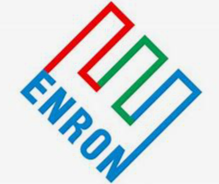

# Enron Hyperlink Prediction by NetAurHPD
Enron Corporation was an American energy, commodities, and services company based in Houston, Texas. At the end of 2001, it was revealed that Enron's reported financial condition was sustained by an creatively planned accounting fraud, known since as the Enron scandal. Enron has become synonymous with willful corporate fraud and corruption.

### Data
The simplices in this dataset are constructed from the Enron email dataset, each simplex corresponds to an email. The data stpred in two files:

- nverts.txt -> [2, 3, 2, 2, 2,...]

- simplices.txt -> [4, 1, 117, 129, 1, 51, 1,...]

**Meaning**:

Hyperlink 1 = {4,1}

Hyperlink 2 = {117,129,1}

Hyperlink 3 = {51,1}

In [1]:
import sys
import os

In [2]:
sys.path.append(os.path.abspath("../..")) 

In [3]:
from NetAurHPD.NetAurHPD_M5 import NetAurHPD_M5
from Examples.data_preprocess import data_preprocess, create_train_and_test_sets
from NetAurHPD.network_auralization_new import SignalPropagation
from Examples.utils import negative_sampling, save_hyperlinks_with_label

Data files path

In [4]:
nodes_data_dir = "enron_data/email-Enron-simplices.txt"
groups_size_data_dir = "enron_data/email-Enron-nverts.txt"

Load data and transform into hypergraph

In [5]:
unique_hyperlink_dict, nodes = data_preprocess(nodes_data_dir, groups_size_data_dir)

Number of hyperlinks: 10452


Save positive hyperlinks with positive label

In [6]:
positive_hyperlink_dict = save_hyperlinks_with_label(unique_hyperlink_dict)

Negative sampling - create negative hyperlinks examples

In [7]:
negative_hyperlink_dict = negative_sampling(nodes,unique_hyperlink_dict)

Create train and test sets

In [8]:
train_positive_hyperlink_dict, train_hyperlink_dict, y_train, test_hyperlink_dict, y_test = create_train_and_test_sets(positive_hyperlink_dict, negative_hyperlink_dict)

Train positive hyperlinks: 874
Train negative hyperlinks: 874
Test positive hyperlinks: 583
Test negative hyperlinks: 583


Create SignalPropagation Object

In [9]:
instrument = SignalPropagation(momentum=0.999, response_len=10000, tqdm=lambda x: x, device='cpu')

1. Run network auralization over the  train set nodes
2. Create the hyperlinks waveforms representation 

Nodes: 143
Edges: 1501
HyperLinks: 874


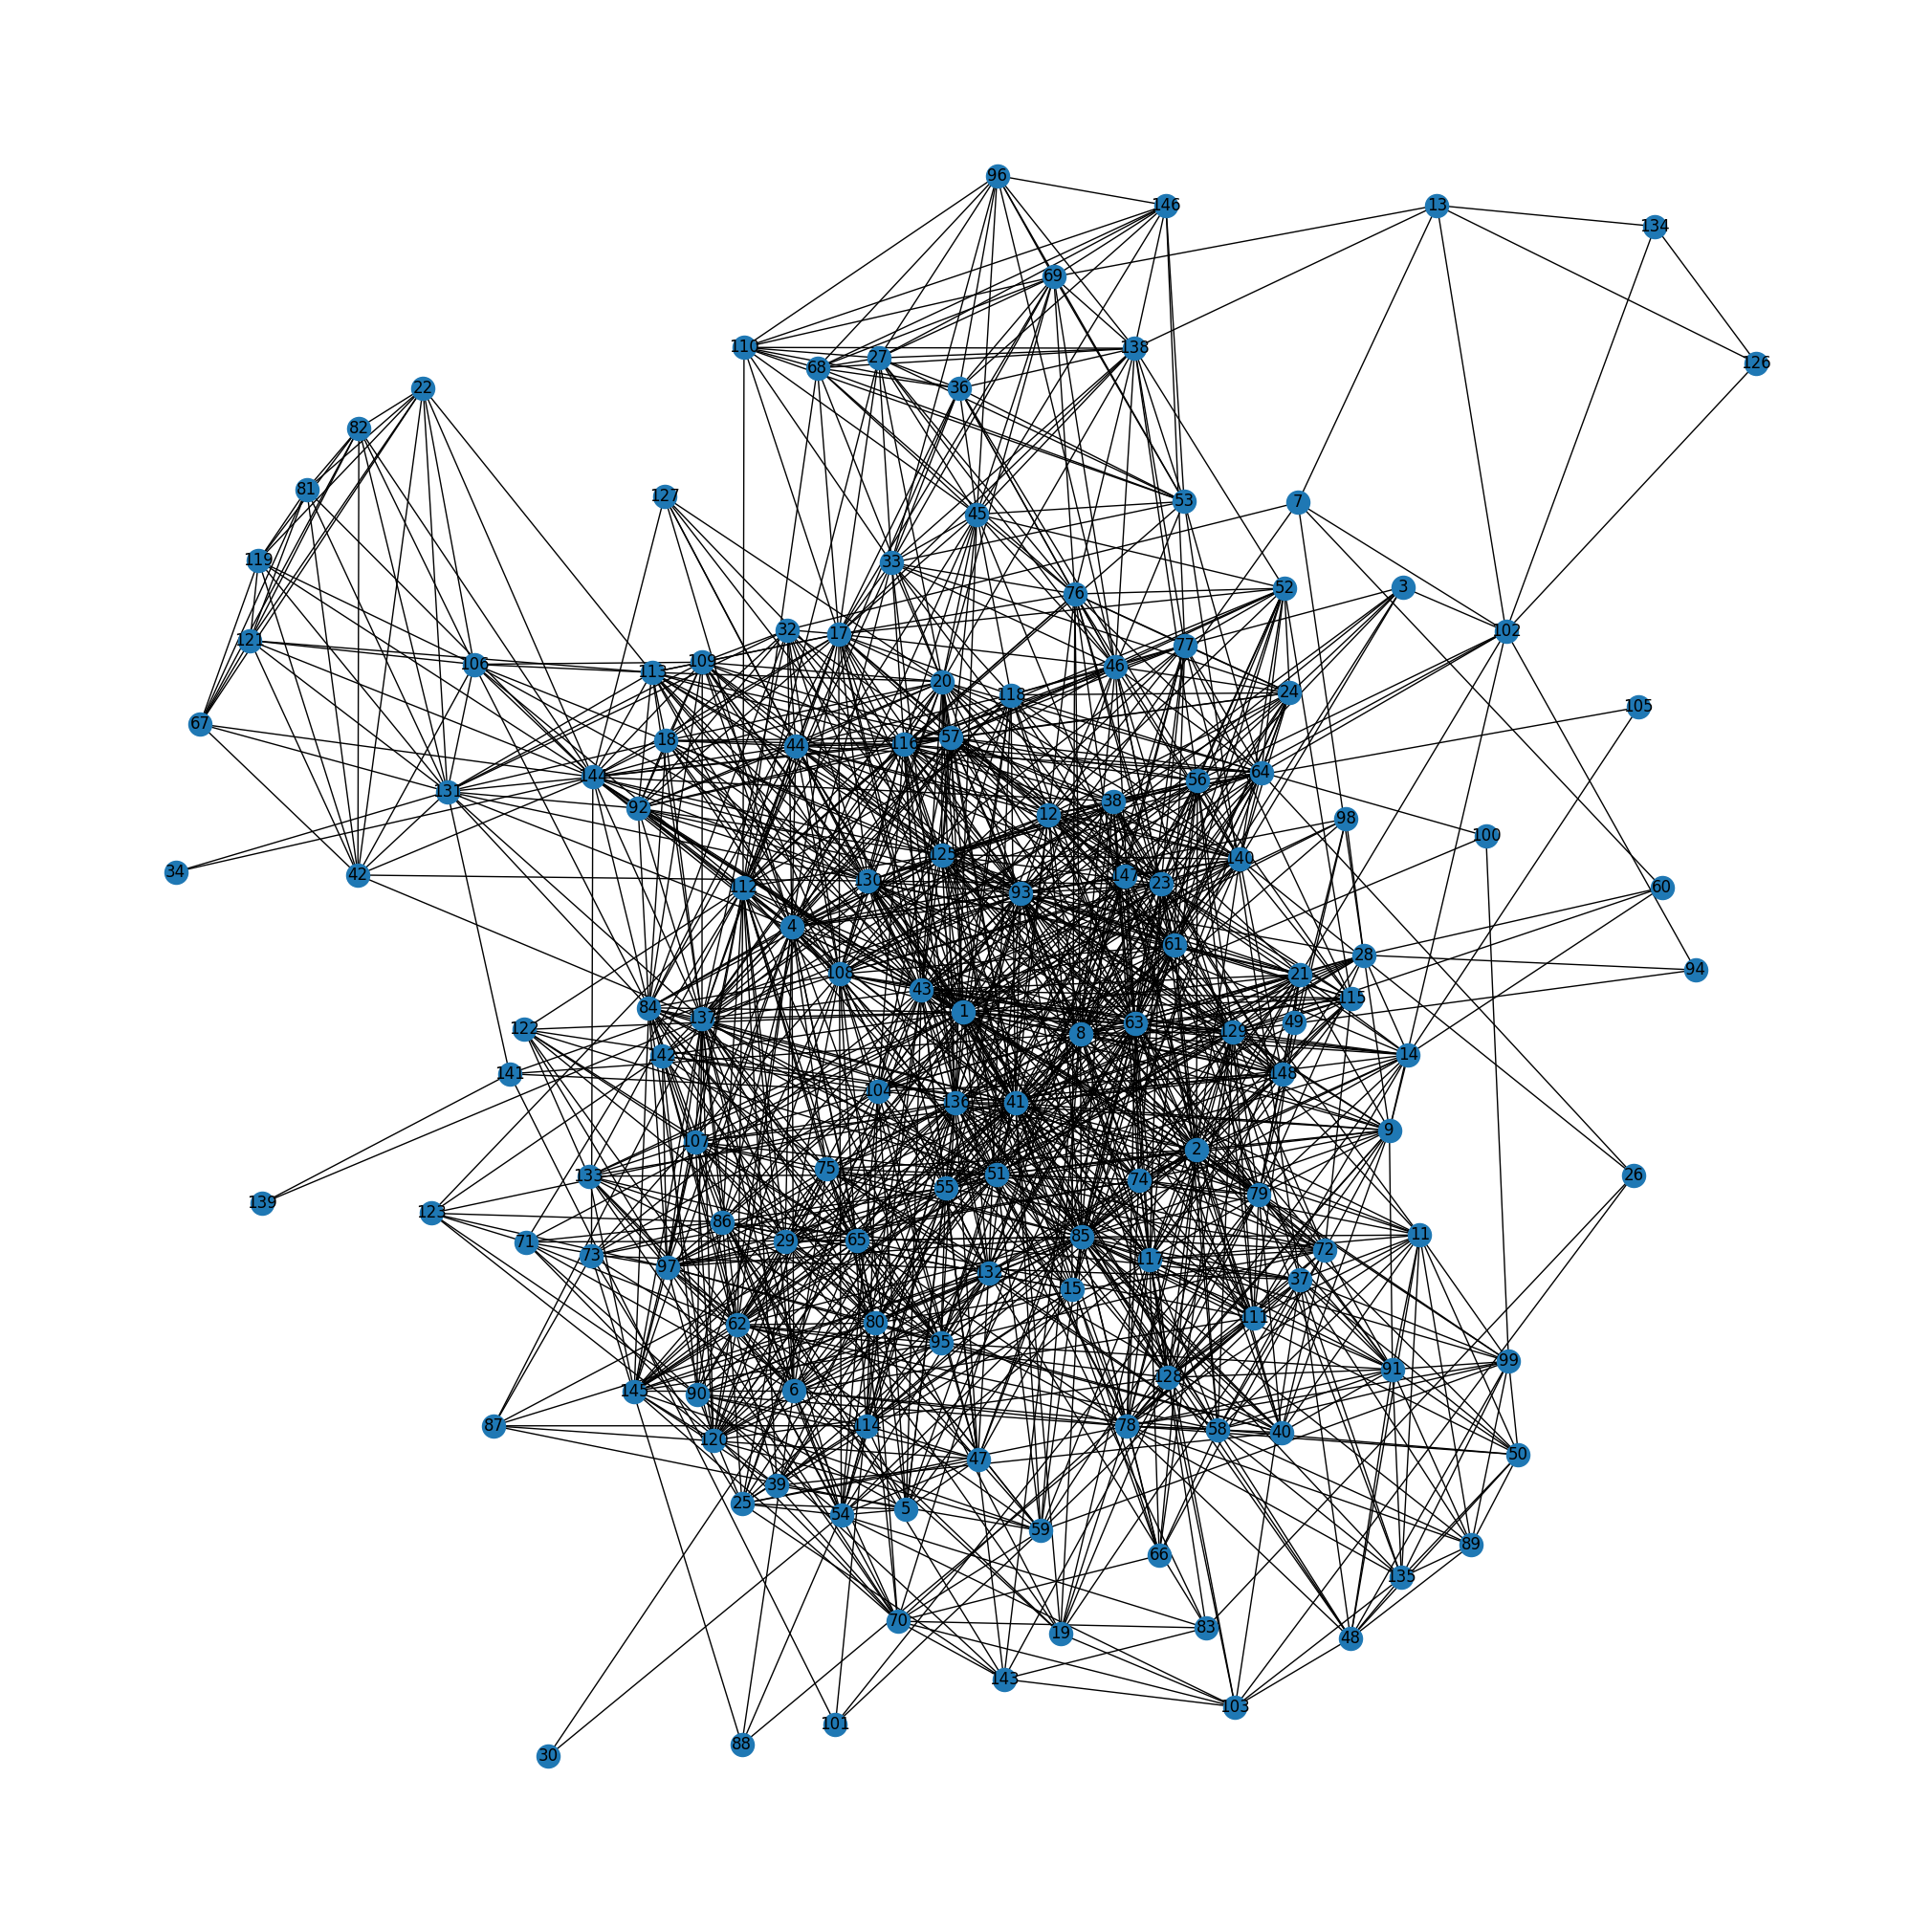

In [10]:
train_hyperlinks_waveforms, test_hyperlinks_waveforms = instrument.networkx_auralization(train_positive_hyperlink_dict,train_hyperlink_dict,test_hyperlink_dict,nodes,True)

Create M5 network

In [11]:
NetAurHPD_DL_architecture = NetAurHPD_M5(n_input=1, n_output=1)

Train M5 over the data and present the results

  0%|                                                                                           | 0/50 [00:00<?, ?it/s]C:\Users\Bar-Tov\Documents\Tamir\Studies\second grade\Thesis\CHESHIRE\cheshire-gapfilling\chesenv\lib\site-packages\torch\nn\functional.py:652: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool1d(input, kernel_size, stride, padding, dilation, ceil_mode)


torch.Size([1748])



  2%|█▋                                                                                 | 1/50 [00:37<30:12, 37.00s/it]

torch.Size([1748])



  4%|███▎                                                                               | 2/50 [01:01<23:36, 29.51s/it]

torch.Size([1748])



  6%|████▉                                                                              | 3/50 [01:16<18:03, 23.05s/it]

torch.Size([1748])



  8%|██████▋                                                                            | 4/50 [01:28<14:20, 18.71s/it]

torch.Size([1748])



 10%|████████▎                                                                          | 5/50 [01:47<14:03, 18.75s/it]

torch.Size([1748])



 12%|█████████▉                                                                         | 6/50 [02:02<12:41, 17.31s/it]

torch.Size([1748])



 14%|███████████▌                                                                       | 7/50 [02:16<11:44, 16.38s/it]

torch.Size([1748])



 16%|█████████████▎                                                                     | 8/50 [02:33<11:32, 16.49s/it]

torch.Size([1748])



 18%|██████████████▉                                                                    | 9/50 [02:45<10:25, 15.25s/it]

torch.Size([1748])



 20%|████████████████▍                                                                 | 10/50 [03:00<09:58, 14.97s/it]

torch.Size([1748])



 22%|██████████████████                                                                | 11/50 [03:15<09:45, 15.02s/it]

torch.Size([1748])



 24%|███████████████████▋                                                              | 12/50 [03:27<09:03, 14.30s/it]

torch.Size([1748])



 26%|█████████████████████▎                                                            | 13/50 [03:40<08:27, 13.73s/it]

torch.Size([1748])



 28%|██████████████████████▉                                                           | 14/50 [03:53<08:10, 13.63s/it]

torch.Size([1748])



 30%|████████████████████████▌                                                         | 15/50 [04:09<08:16, 14.19s/it]

torch.Size([1748])



 32%|██████████████████████████▏                                                       | 16/50 [04:23<08:08, 14.37s/it]

torch.Size([1748])



 34%|███████████████████████████▉                                                      | 17/50 [04:36<07:39, 13.91s/it]

torch.Size([1748])



 36%|█████████████████████████████▌                                                    | 18/50 [04:54<08:00, 15.03s/it]

torch.Size([1748])



 38%|███████████████████████████████▏                                                  | 19/50 [05:17<09:02, 17.50s/it]

torch.Size([1748])



 40%|████████████████████████████████▊                                                 | 20/50 [05:31<08:14, 16.47s/it]

torch.Size([1748])



 42%|██████████████████████████████████▍                                               | 21/50 [05:44<07:29, 15.49s/it]

torch.Size([1748])



 44%|████████████████████████████████████                                              | 22/50 [05:57<06:50, 14.67s/it]

torch.Size([1748])



 46%|█████████████████████████████████████▋                                            | 23/50 [06:14<06:49, 15.18s/it]

torch.Size([1748])



 48%|███████████████████████████████████████▎                                          | 24/50 [06:35<07:27, 17.20s/it]

torch.Size([1748])



 50%|█████████████████████████████████████████                                         | 25/50 [07:08<09:02, 21.69s/it]

torch.Size([1748])



 52%|██████████████████████████████████████████▋                                       | 26/50 [07:37<09:38, 24.11s/it]

torch.Size([1748])



 54%|████████████████████████████████████████████▎                                     | 27/50 [08:00<09:00, 23.52s/it]

torch.Size([1748])



 56%|█████████████████████████████████████████████▉                                    | 28/50 [08:20<08:15, 22.52s/it]

torch.Size([1748])



 58%|███████████████████████████████████████████████▌                                  | 29/50 [08:40<07:40, 21.91s/it]

torch.Size([1748])



 60%|█████████████████████████████████████████████████▏                                | 30/50 [09:02<07:15, 21.79s/it]

torch.Size([1748])



 62%|██████████████████████████████████████████████████▊                               | 31/50 [09:20<06:32, 20.67s/it]

torch.Size([1748])



 64%|████████████████████████████████████████████████████▍                             | 32/50 [09:41<06:13, 20.76s/it]

torch.Size([1748])



 66%|██████████████████████████████████████████████████████                            | 33/50 [09:57<05:30, 19.44s/it]

torch.Size([1748])



 68%|███████████████████████████████████████████████████████▊                          | 34/50 [10:15<05:01, 18.82s/it]

torch.Size([1748])



 70%|█████████████████████████████████████████████████████████▍                        | 35/50 [10:29<04:24, 17.63s/it]

torch.Size([1748])



 72%|███████████████████████████████████████████████████████████                       | 36/50 [10:41<03:42, 15.86s/it]

torch.Size([1748])



 74%|████████████████████████████████████████████████████████████▋                     | 37/50 [11:01<03:43, 17.19s/it]

torch.Size([1748])



 76%|██████████████████████████████████████████████████████████████▎                   | 38/50 [11:33<04:19, 21.60s/it]

torch.Size([1748])



 78%|███████████████████████████████████████████████████████████████▉                  | 39/50 [11:53<03:51, 21.04s/it]

torch.Size([1748])



 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [12:15<03:33, 21.38s/it]

torch.Size([1748])



 82%|███████████████████████████████████████████████████████████████████▏              | 41/50 [12:32<03:00, 20.07s/it]

torch.Size([1748])



 84%|████████████████████████████████████████████████████████████████████▉             | 42/50 [12:51<02:37, 19.75s/it]

torch.Size([1748])



 86%|██████████████████████████████████████████████████████████████████████▌           | 43/50 [13:08<02:12, 18.96s/it]

torch.Size([1748])



 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [13:24<01:48, 18.08s/it]

torch.Size([1748])



 90%|█████████████████████████████████████████████████████████████████████████▊        | 45/50 [13:42<01:29, 17.86s/it]

torch.Size([1748])



 92%|███████████████████████████████████████████████████████████████████████████▍      | 46/50 [14:03<01:16, 19.03s/it]

torch.Size([1748])



 94%|█████████████████████████████████████████████████████████████████████████████     | 47/50 [14:19<00:53, 17.94s/it]

torch.Size([1748])



 96%|██████████████████████████████████████████████████████████████████████████████▋   | 48/50 [14:34<00:34, 17.08s/it]

torch.Size([1748])



 98%|████████████████████████████████████████████████████████████████████████████████▎ | 49/50 [14:46<00:15, 15.58s/it]

torch.Size([1748])


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [14:58<00:00, 17.97s/it]


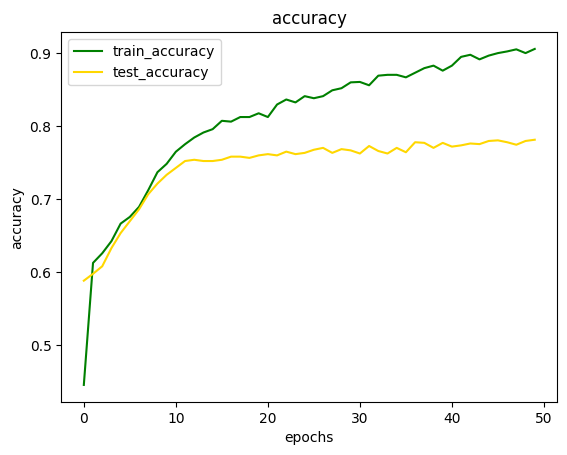

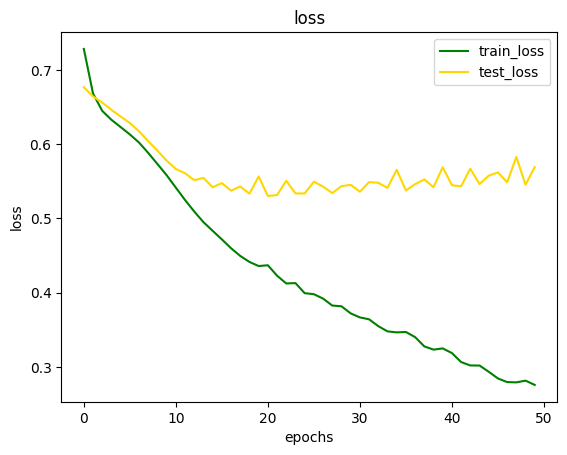

Max train accuracy: 0.9056064073226545
Max test accuracy: 0.7813036020583191


<Figure size 640x480 with 0 Axes>

In [12]:
y_pred = NetAurHPD_DL_architecture.predict(train_hyperlinks_waveforms, y_train, test_hyperlinks_waveforms, y_test)